In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 <br>

 # ANALISIS EXPLORATORIO DE LOS DATOS
 <br>
<br>

 
 
 

## Lectura del dataset y obtención de información básica.

In [2]:
data= pd.read_csv("Data/train.csv")
data = data.drop('Id', axis=1)


In [3]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
summary = [
    [col, data[col].dtype, data[col].count(), data[col].nunique(), data[col].isnull().sum(), data.duplicated().sum()]
    for col in data.columns
]

df_check = pd.DataFrame(summary, columns=['column', 'dtype', 'instances', 'unique', 'missing_vals', 'duplicates'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

df_check

,column,dtype,instances,unique,missing_vals,duplicates
0,MSSubClass,int64,1460,15,0,0
1,MSZoning,object,1460,5,0,0
2,LotFrontage,float64,1201,110,259,0
3,LotArea,int64,1460,1073,0,0
4,Street,object,1460,2,0,0
5,Alley,object,91,2,1369,0
6,LotShape,object,1460,4,0,0
7,LandContour,object,1460,4,0,0
8,Utilities,object,1460,2,0,0
9,LotConfig,object,1460,5,0,0


Se observa un valor muy alto de datos faltantes en algunas columnas (teniendo en cuenta que el dataset tiene 1460 filas, algunas variables alcanzan hasta un 90 % de valores NaN). Sin embargo, no se van a descartar estas variables de inmediato, ya que aún podrían ofrecer información útil. Los valores nulos en la columna Fence podrían explicarse como la ausencia de cercas y ser sustituidos por un 0.

## Distribución de los valores numéricos

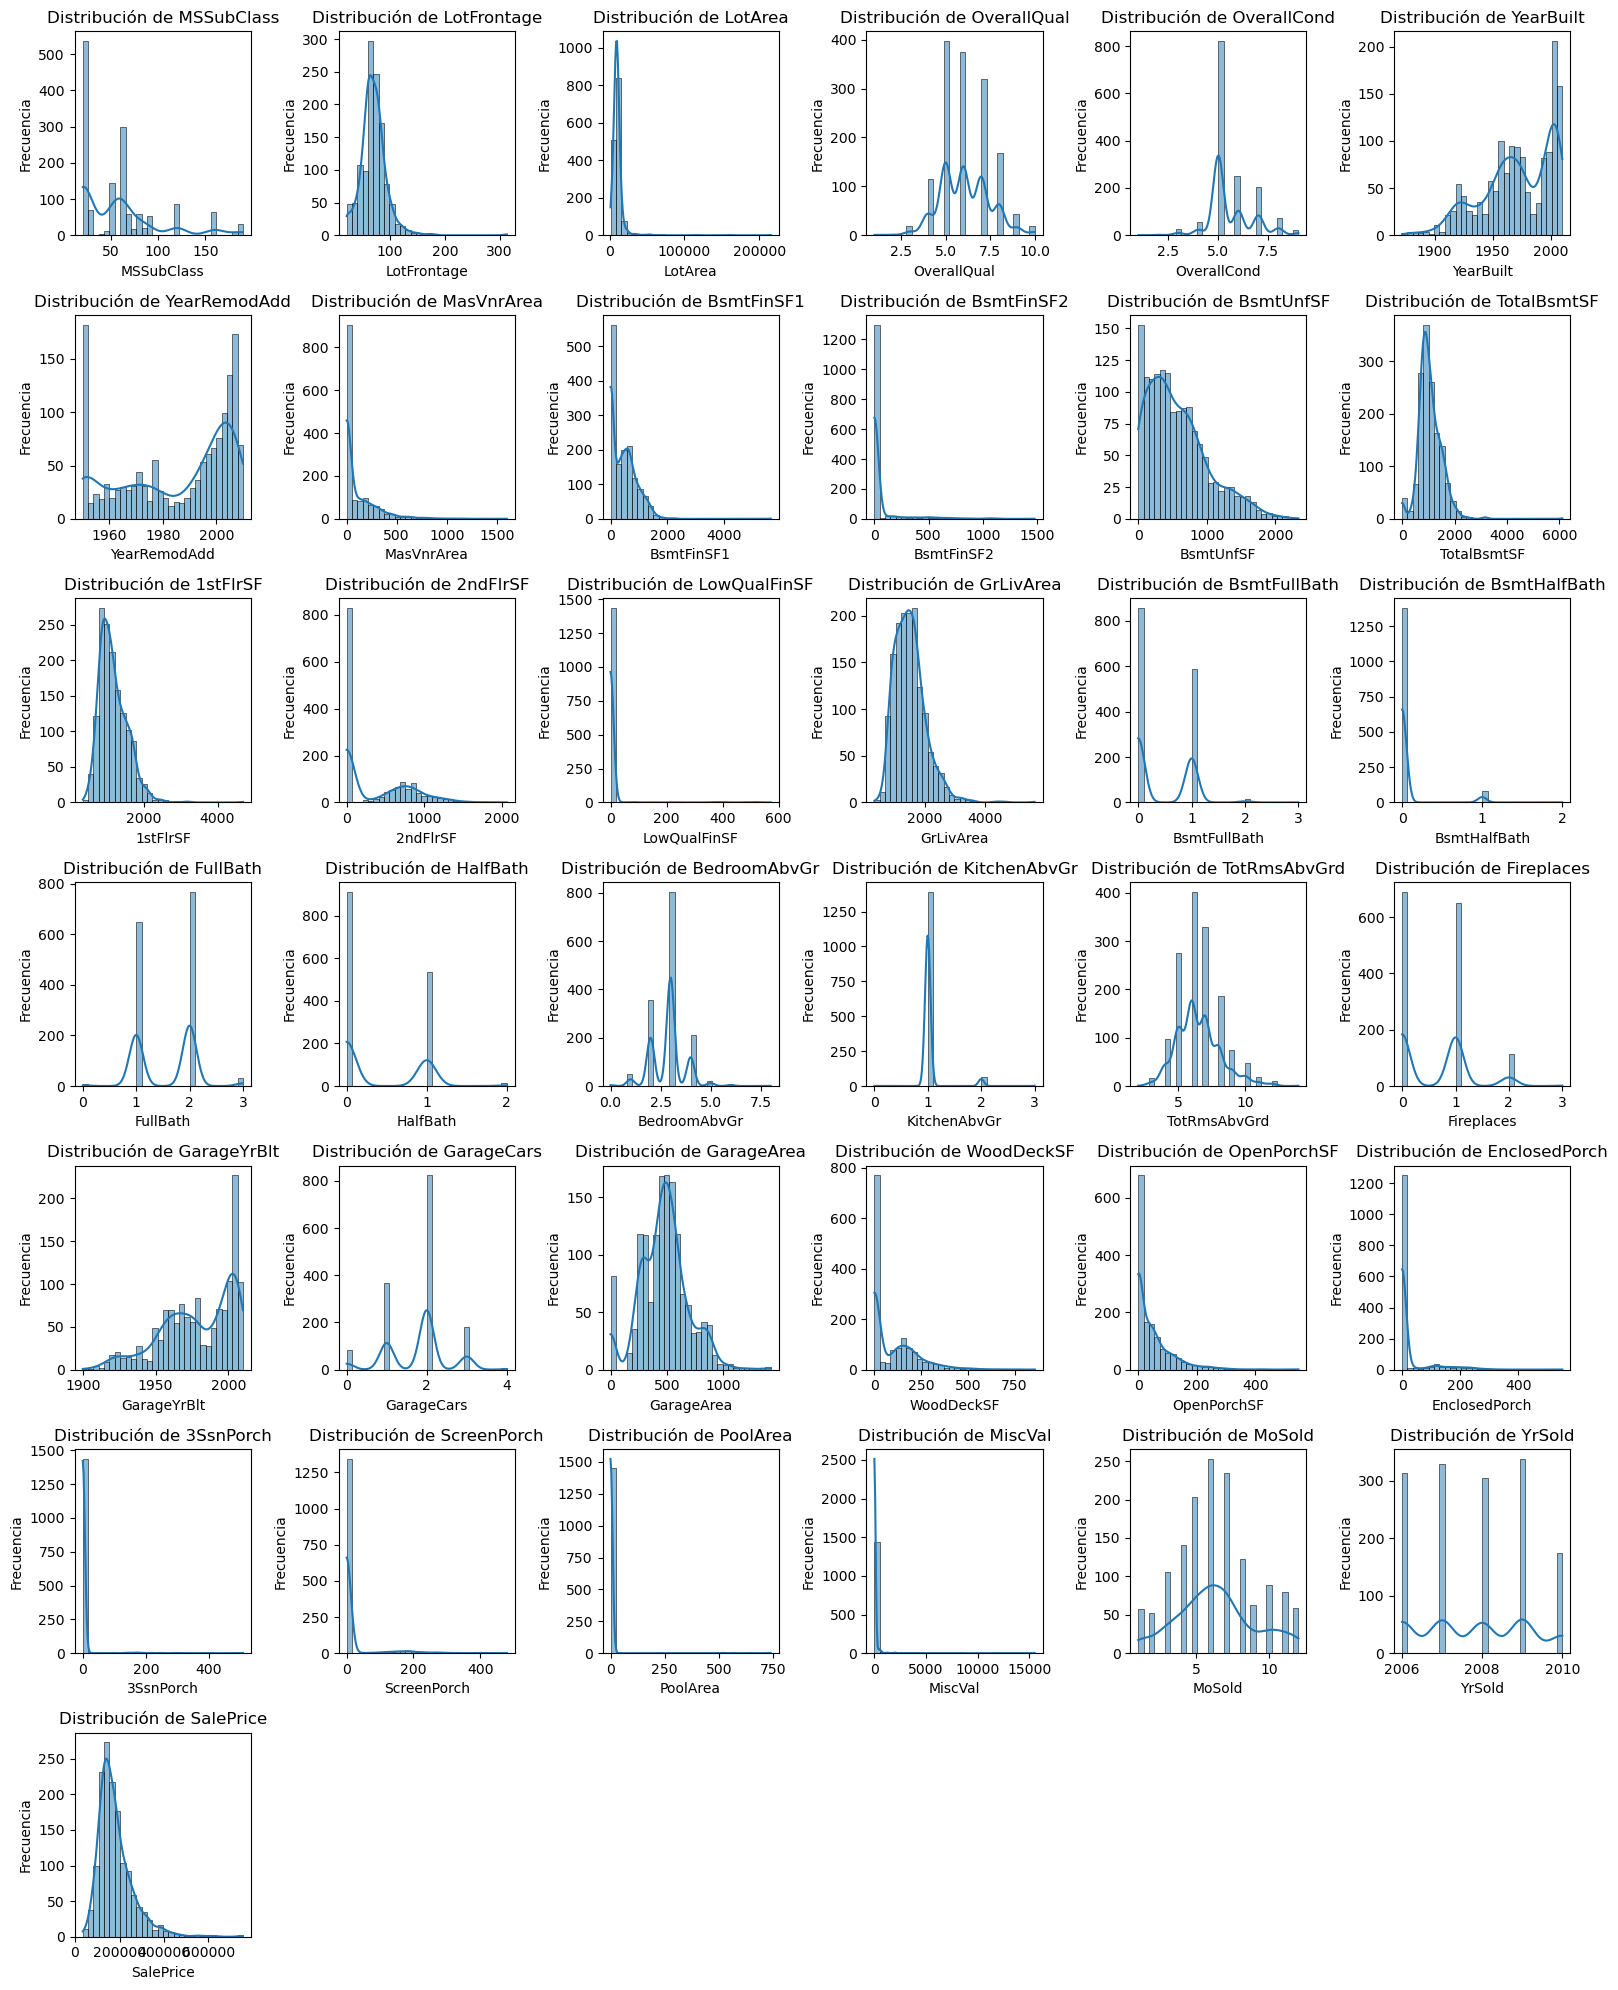

In [5]:

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 20))

n = len(numeric_cols)
cols = 6  
rows = (n // cols) + (n % cols > 0)  

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)  
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout() 
plt.show()
plt.close()



Lo primero que llama la atención es que algunas columnas numéricas podrían ser, en realidad, categóricas. Tras revisar la descripción de los datos proporcionada, podemos concluir que MSSubClass es, de hecho, una columna categórica. También se observa que algunas variables presentan un sesgo a la derecha en su distribución, lo que las hace susceptibles de una transformación logarítmica o similar.

## Distribución de las columnas categóricas.

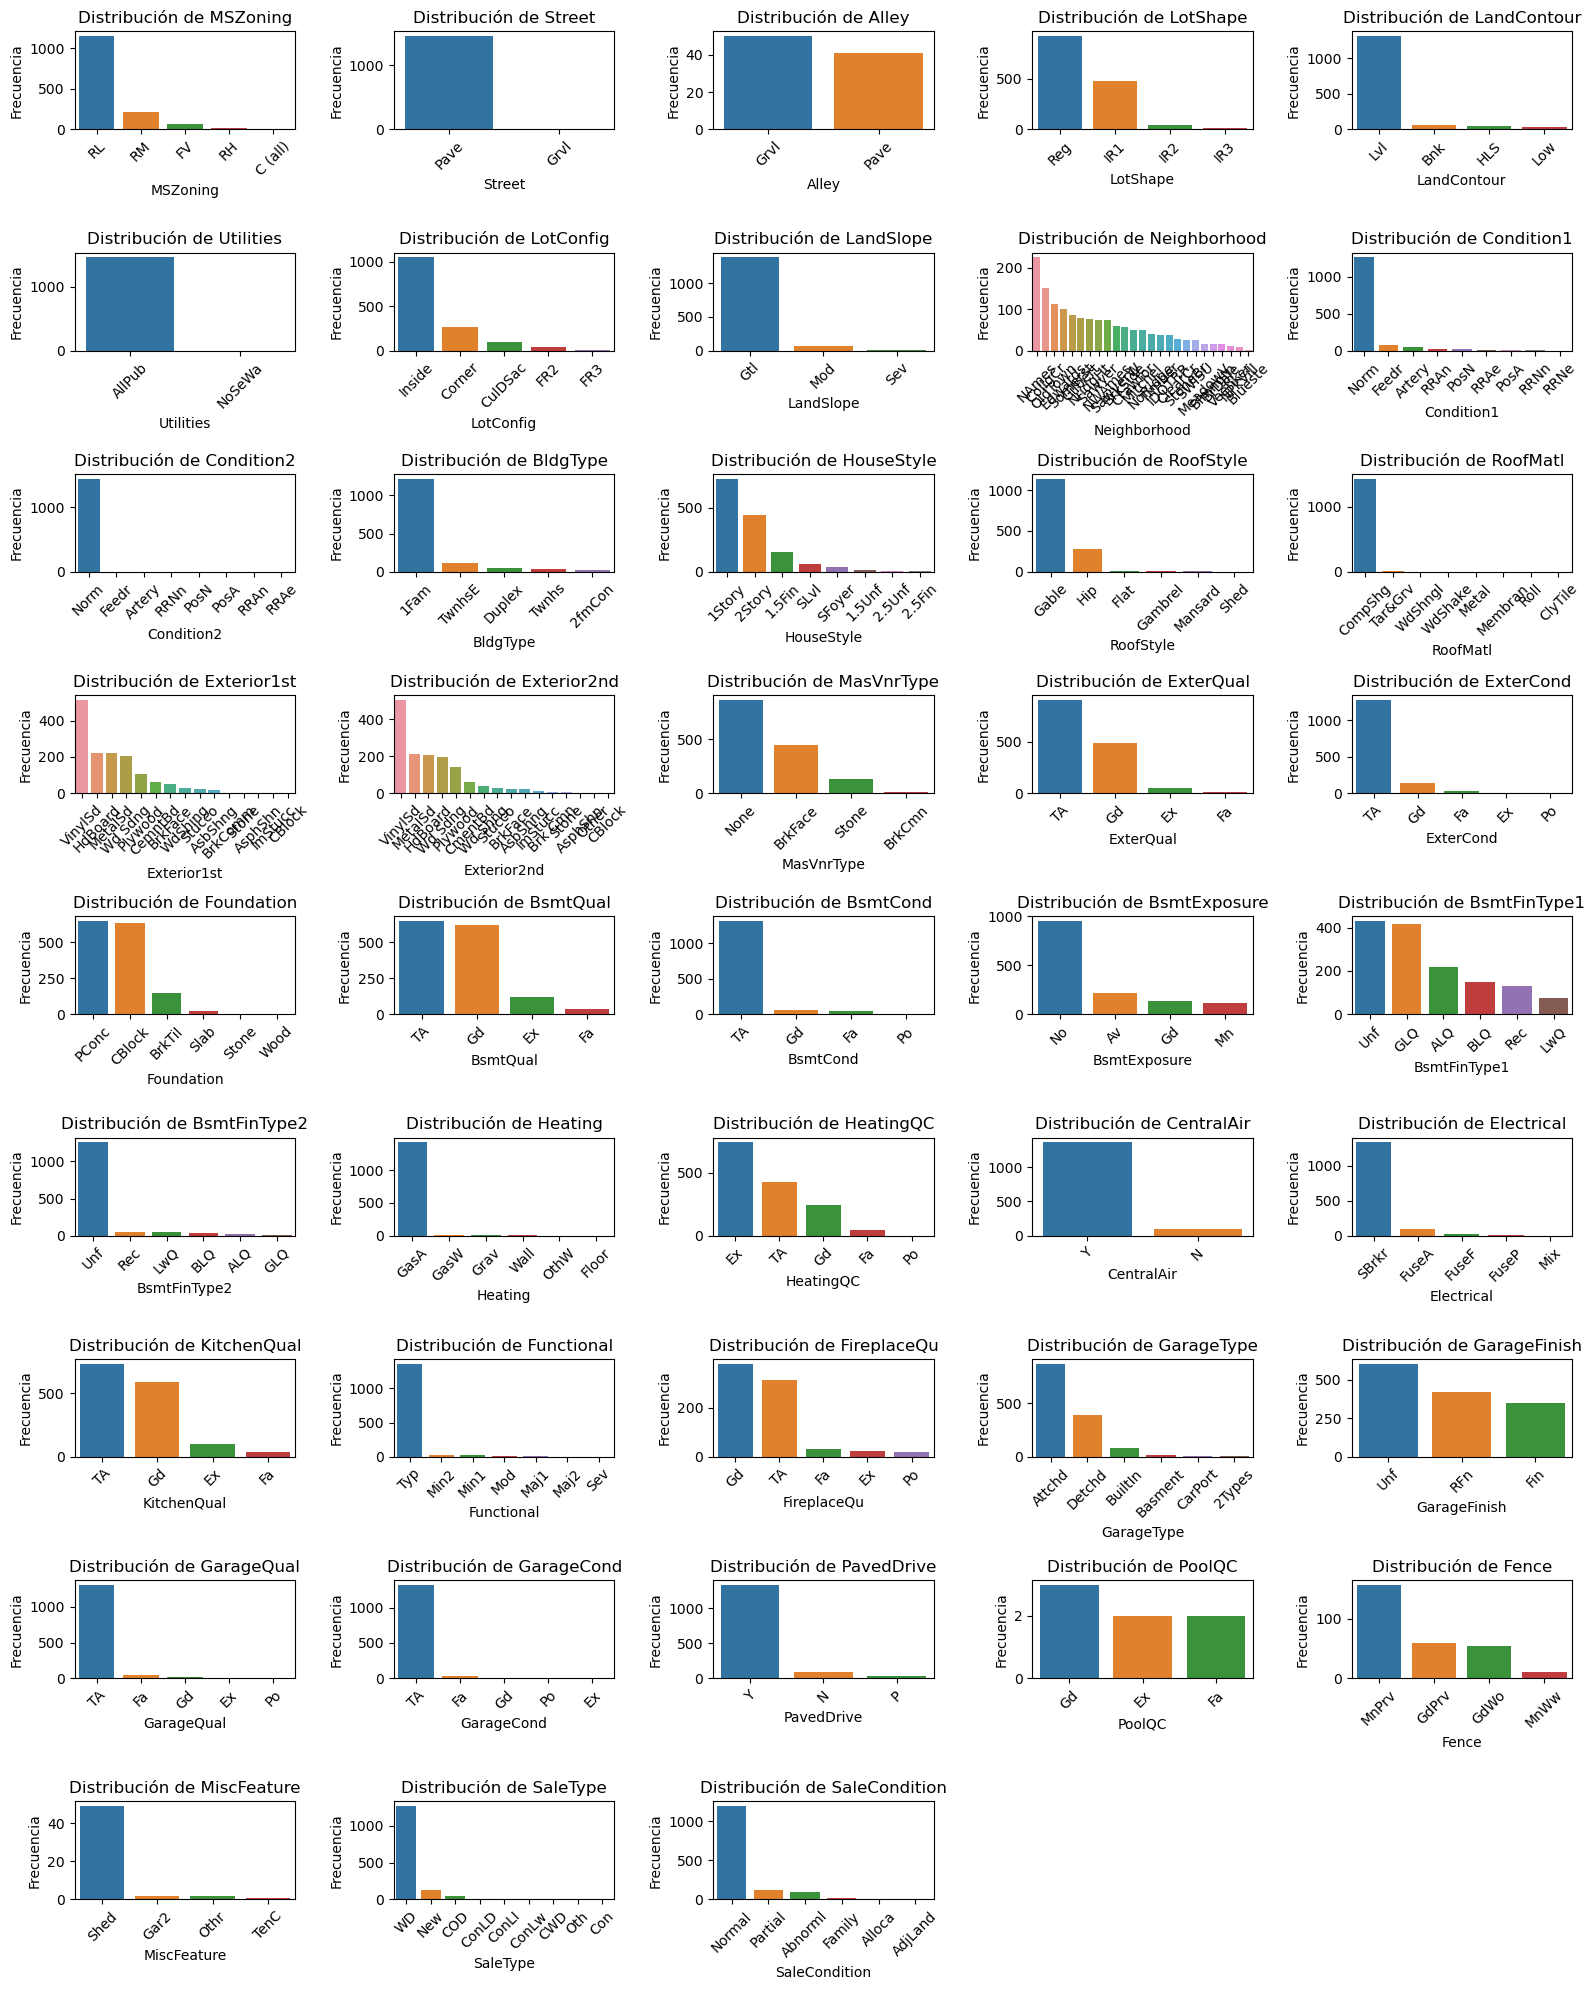

In [6]:

categoric_cols = data.select_dtypes(include='object').columns

plt.figure(figsize=(16, 20))

n = len(categoric_cols)
cols = 5
rows = (n // cols) + (n % cols > 0)  

for i, col in enumerate(categoric_cols):
    plt.subplot(rows, cols, i + 1)  
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  

plt.tight_layout()

plt.show()

Hay algunas variables que tienen una única categoría, lo que las hace completamente inútiles, por lo que deben ser eliminadas. Además, hay otras variables en las que una categoría domina de manera significativa sobre las demás, lo que las hace susceptibles de algún tipo de transformación para reducir la dimensionalidad. Por último, un tercer grupo de variables presenta demasiadas categorías que el futuro muy posiblemente deberán ser reducidas para controlar la dimensionalidad del modelo.

## Correlacion de la variable objetivo con las demás variables

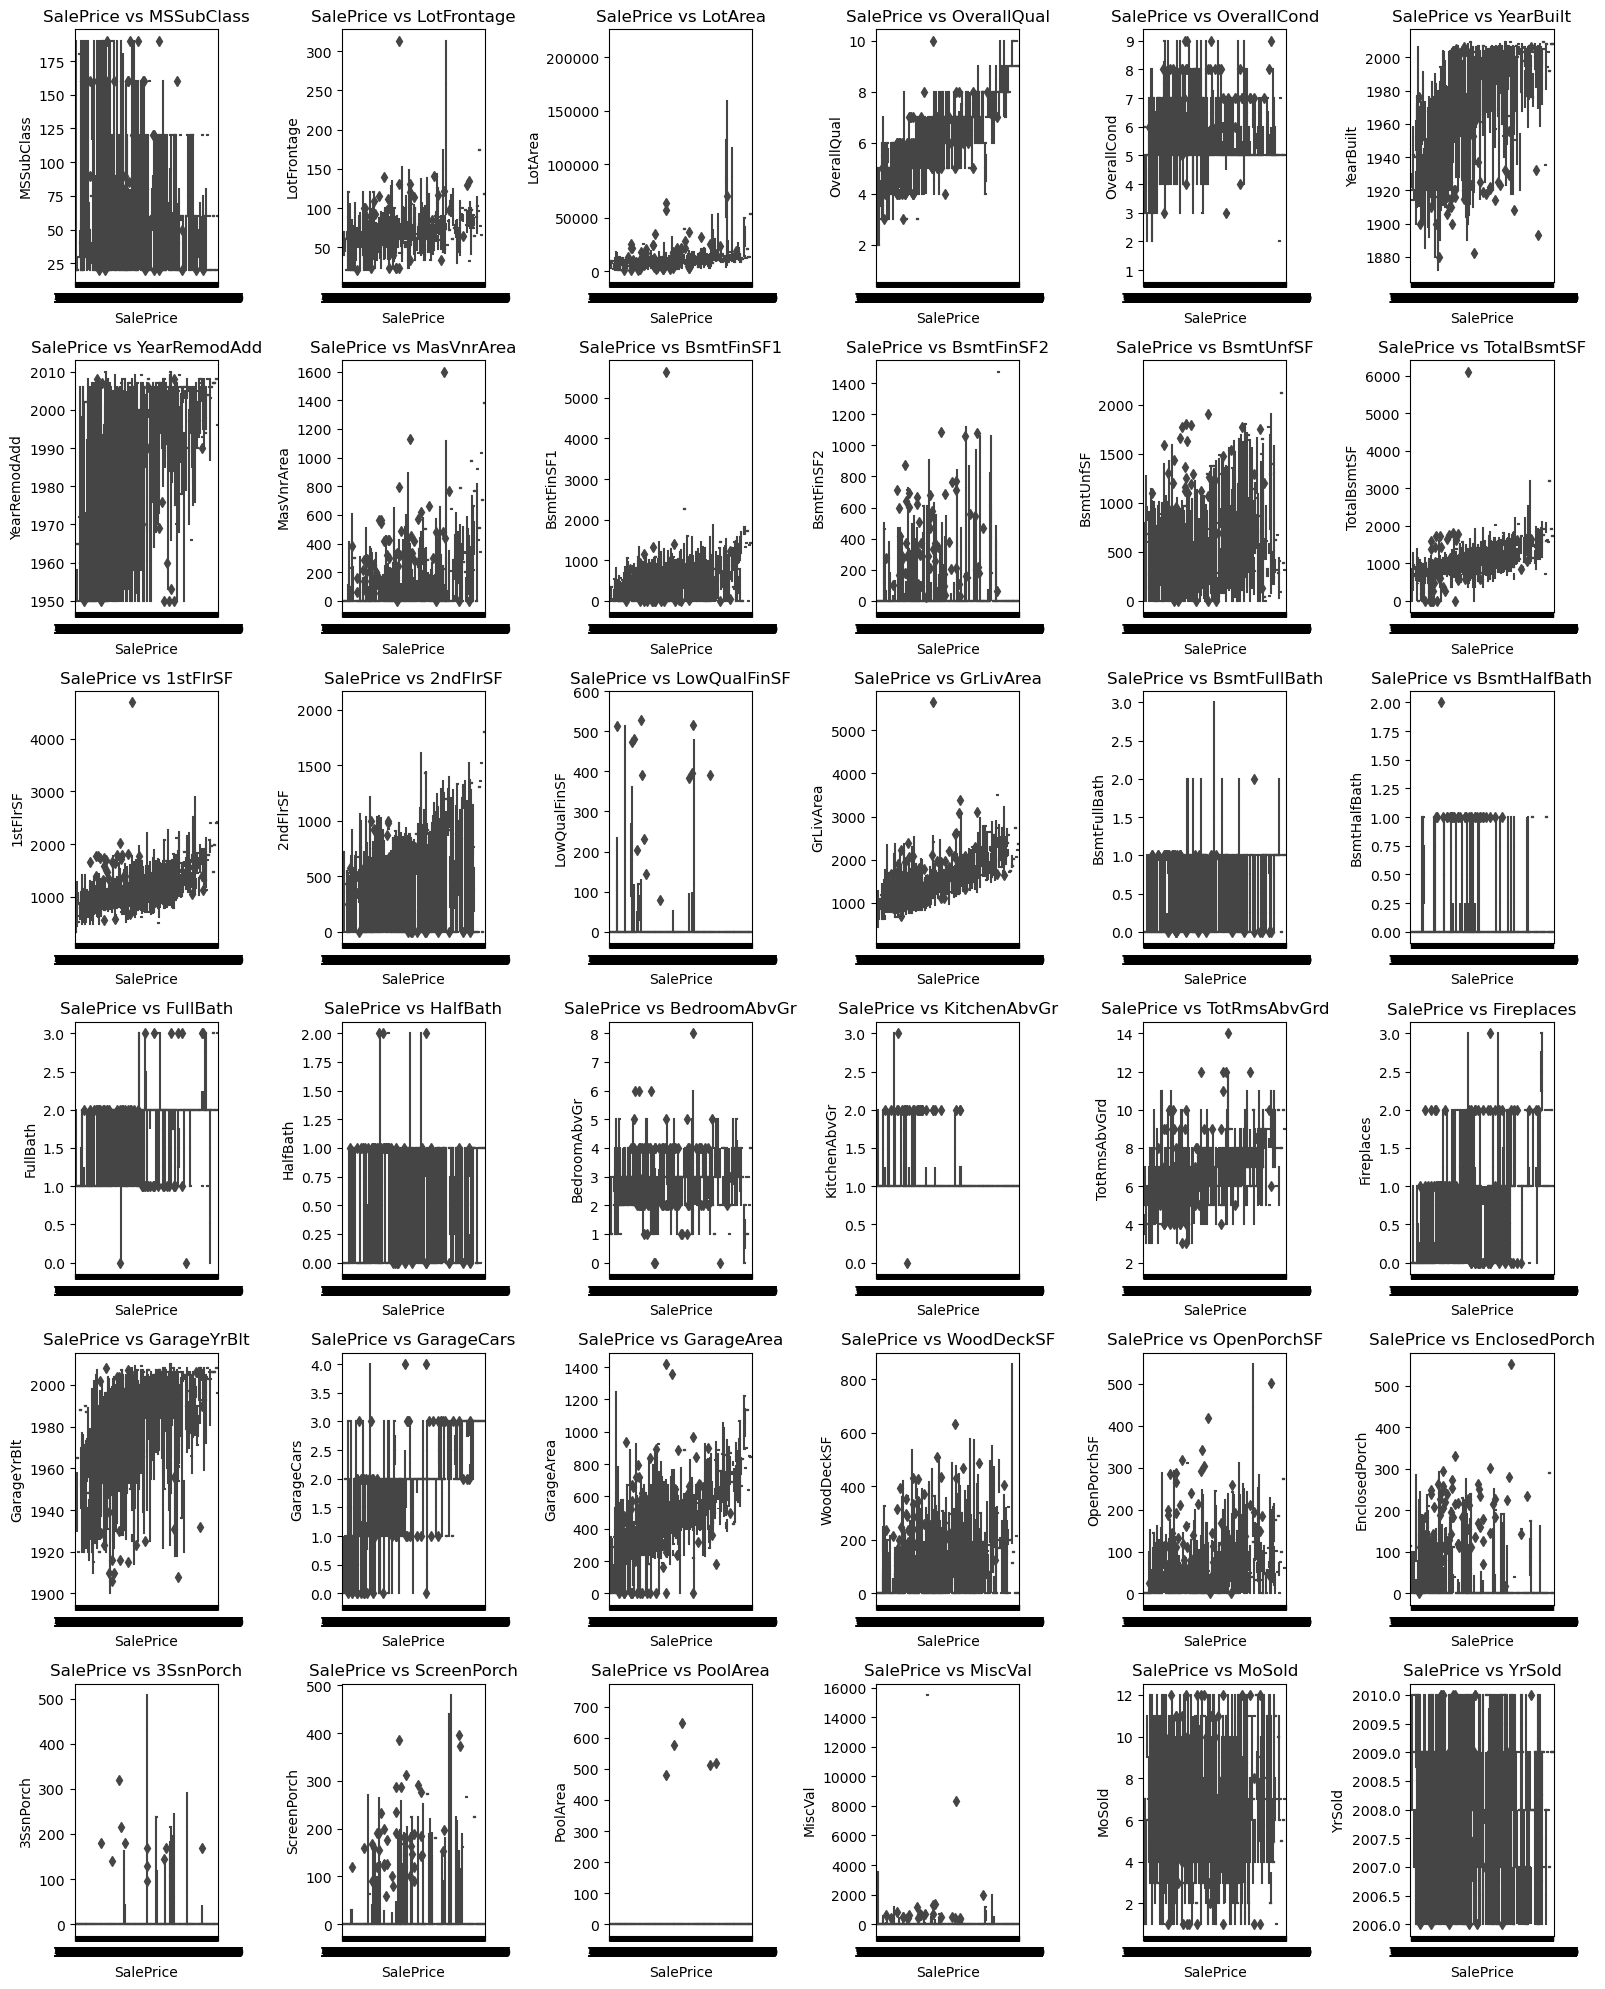

In [7]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols[numeric_cols != 'SalePrice']

plt.figure(figsize=(16, 20))

n = len(numeric_cols)
cols = 6  
rows = (n // cols) + (n % cols > 0)  
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1) 
    sns.boxplot(x='SalePrice', y=col, data = data)
    plt.title(f'SalePrice vs {col}')
    plt.xlabel('SalePrice') 
    plt.ylabel(col)  
plt.tight_layout() 
plt.show() 
plt.close()


Se observa que algunas variables están fuertemente correlacionadas con la variable objetivo, mientras que otras no lo están tanto. Sin embargo, estas últimas pueden ser importantes para el modelo al establecer relaciones no lineales.

## Matriz de correlación

C:\Users\oscar\AppData\Local\Temp\ipykernel_4644\2798148080.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm')


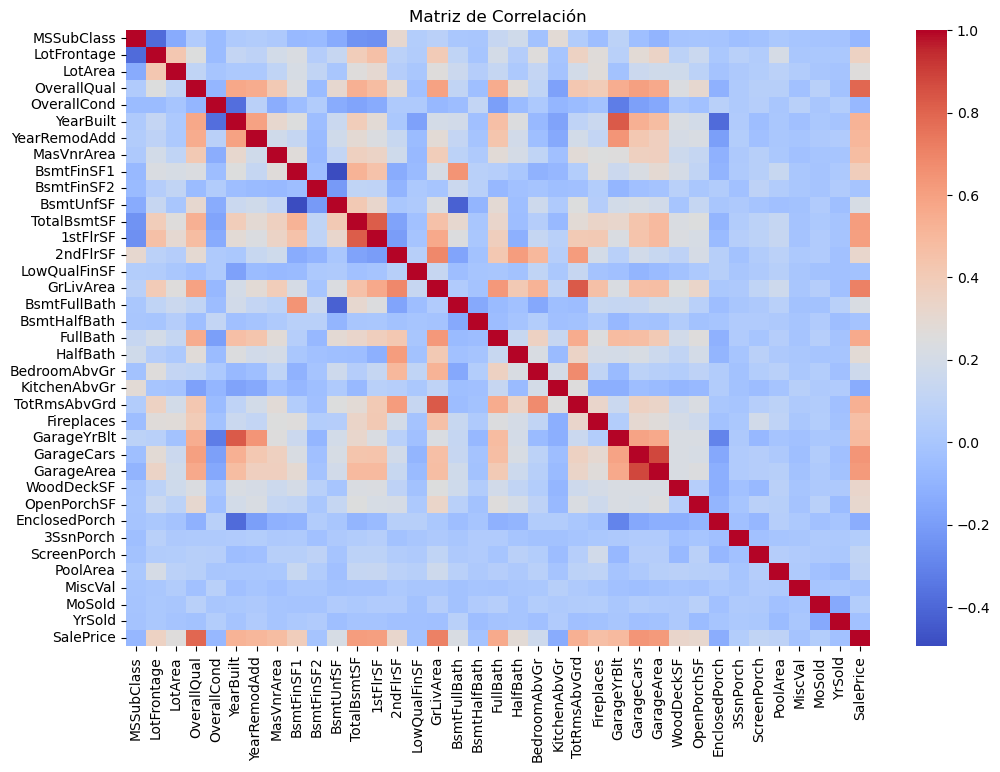

In [8]:

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm')  
plt.title('Matriz de Correlación')
plt.savefig("distribucion_categorica.png", dpi=75, bbox_inches='tight')  
plt.show()

Volvemos a ver fuertes correlaciones tanto con SalePrice como entre otras variables. Por ejemplo, las correlaciones de YearBuilt con otras variables sugieren distintas preferencias en el diseño de las casas a lo largo de los años.

## Valores atípicos

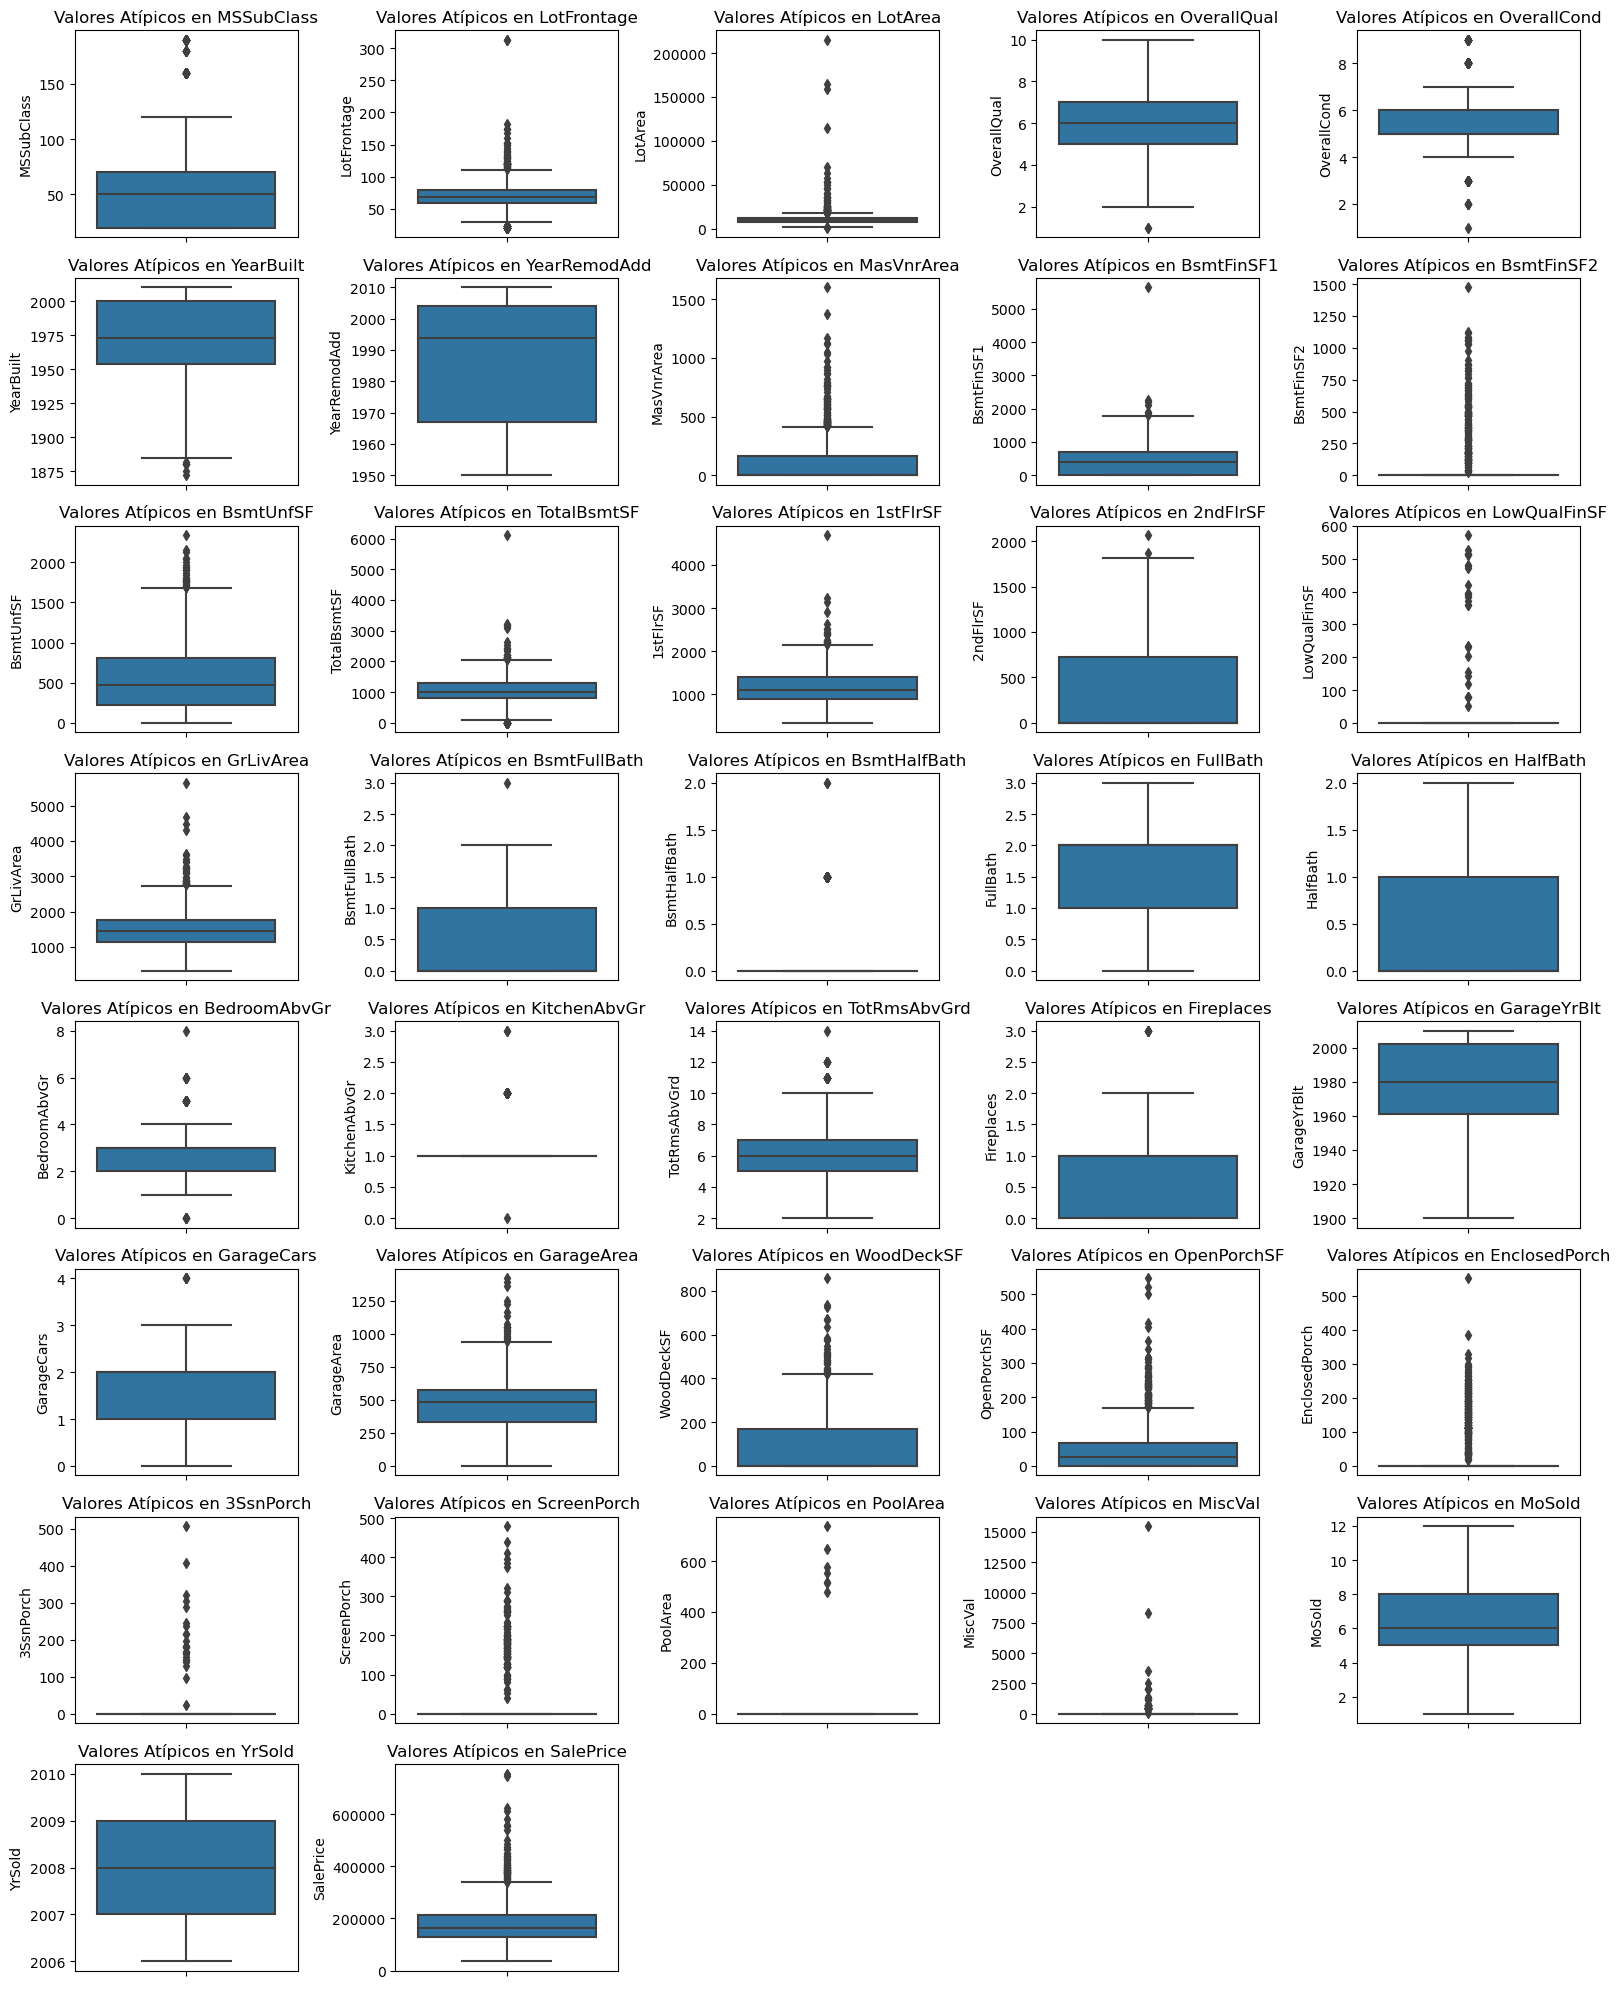

In [9]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 20))

n = len(numeric_cols)
cols = 5  
rows = (n // cols) + (n % cols > 0)  

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)  
    sns.boxplot(y = data[col])
    plt.title(f'Valores Atípicos en {col}')

plt.tight_layout() 
plt.show() 



Parece que muchas variables tienen valores atípicos. Sin embargo, dada la naturaleza del dataset, no se puede saber a priori si son valores legítimamente altos o si se deben a errores en la recolección de datos. Este hecho, junto con el uso de modelos robustos que manejan bien los outliers para la predicción, descarta cualquier tipo de eliminación generalizada de estos valores. En su lugar, se tratará cada caso de forma individual.

## Análisis de Distribuciones Conjuntas.

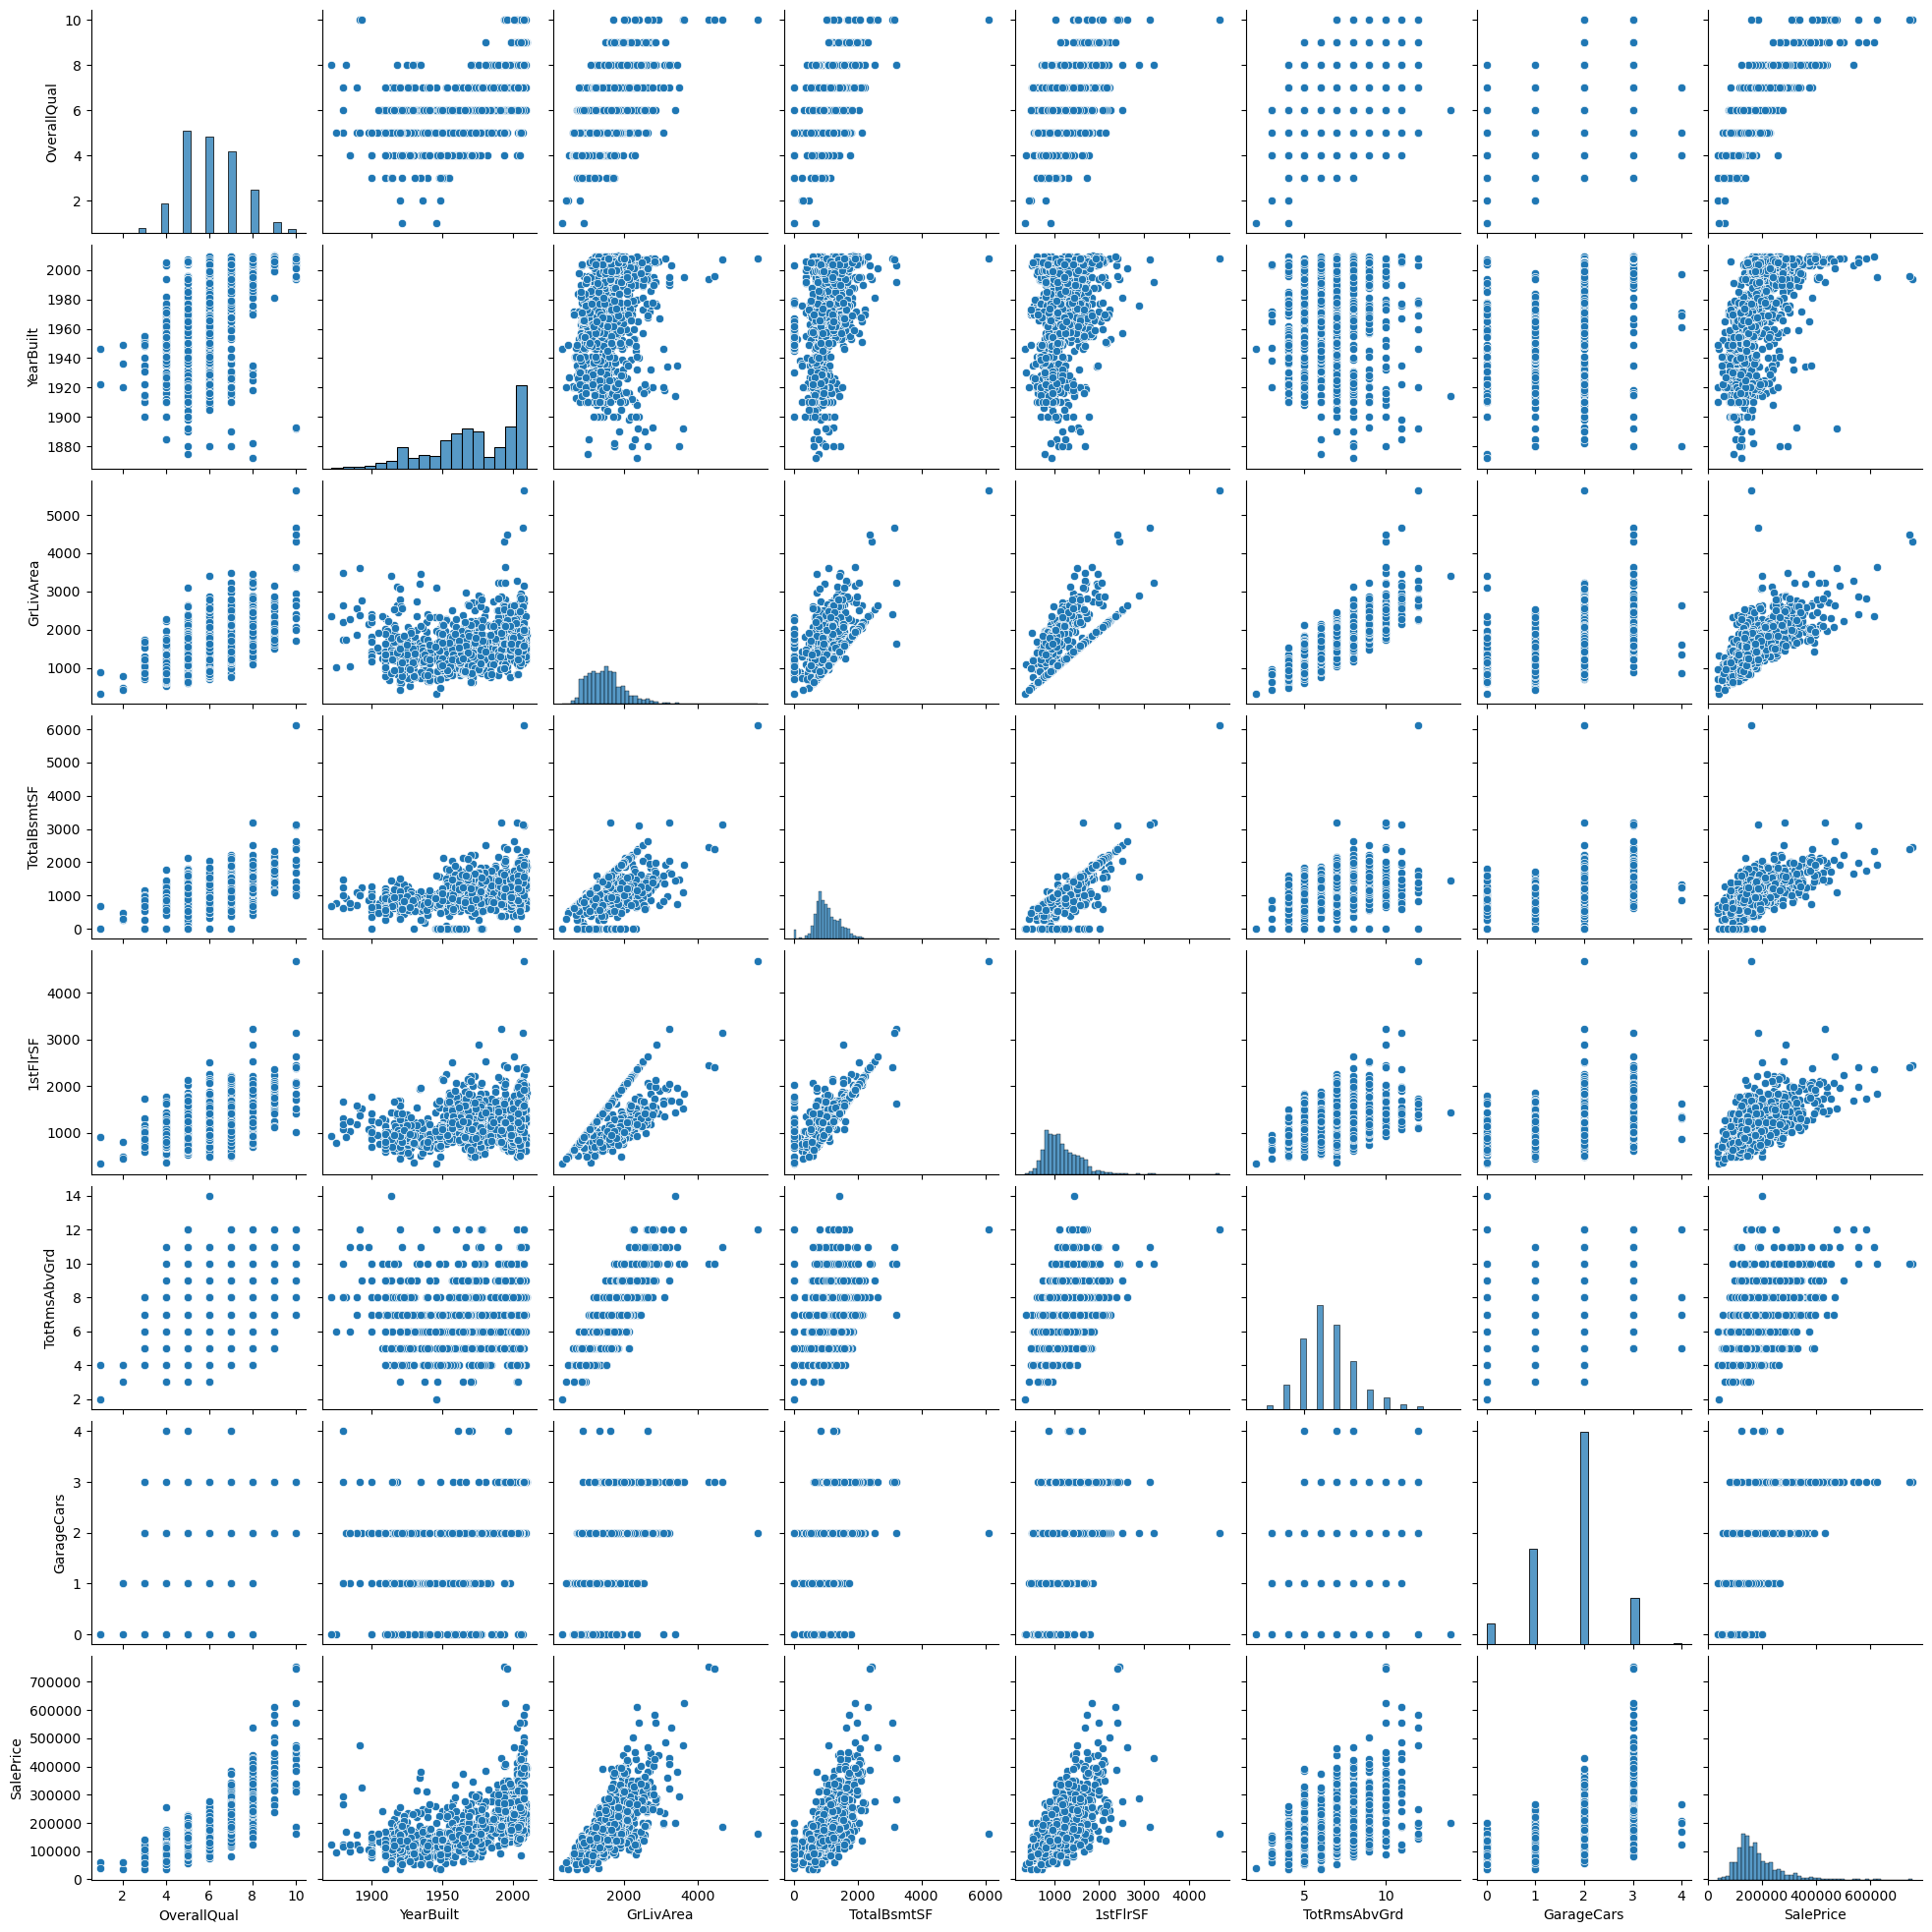

In [10]:
key_vars = ['OverallQual', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']

sns.pairplot(data[key_vars])

plt.show()

Se seleccionan variables que presentan una fuerte correlación con SalePrice y se analiza cómo se relacionan entre sí. Algunas de estas variables muestran una alta correlación entre ellas, lo que indica la presencia de multicolinealidad. Este aspecto debe ser considerado al momento de preprocesar los datos, por ejemplo, combinando ciertas columnas.